# Validity of between-group fMRI studies using subject data processed with different pipelines

In [1]:
import error_rate_computation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import nibabel as nib

## Same-pipeline analyses

The following code boxes contain the code to extract the error rates for same-pipeline analyses and reproduce the Table 1 of the paper. 

FPR computed for SPM pipelines:

In [9]:
error_rate_dir = '../figures/error_rates'
df = pd.DataFrame(columns = [('Smooth 5mm', 'No derivatives'),
                            ('Smooth 5mm', 'Derivatives'),
                            ('Smooth 8mm', 'No derivatives'),
                            ('Smooth 8mm', 'Derivatives')])
soft ='fsl'
for mc in ['0', '6', '24']:
    er = []
    for s in [5,8]:
        for h in [0,1]:
            with open(f'{error_rate_dir}/ER_{soft}-{s}-{mc}-{h}_VS_{soft}-{s}-{mc}-{h}/error_rate.txt', 'r') as f:
                er_list = f.read()
            f.close()

            er.append(er_list.split(',')[0])
    df = pd.concat([df, pd.DataFrame([er], columns = df.columns)], ignore_index=True)

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index = ['0 motion regressors', '6 motion regressors', '24 motion regressors']
df.to_csv('../figures/same_pipelines-fsl.csv')

FPR computed for FSL pipelines:

In [10]:
df = pd.DataFrame(columns = [('Smooth 5mm', 'No derivatives'),
                            ('Smooth 5mm', 'Derivatives'),
                            ('Smooth 8mm', 'No derivatives'),
                            ('Smooth 8mm', 'Derivatives')])
soft ='spm'
for mc in ['0', '6', '24']:
    er = []
    for s in [5,8]:
        for h in [0,1]:
            with open(f'{error_rate_dir}/ER_{soft}-{s}-{mc}-{h}_VS_{soft}-{s}-{mc}-{h}/error_rate.txt', 'r') as f:
                er_list = f.read()
            f.close()

            er.append(er_list.split(',')[0])
    df = pd.concat([df, pd.DataFrame([er], columns = df.columns)], ignore_index=True)

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index = ['0 motion regressors', '6 motion regressors', '24 motion regressors']
df.to_csv('../figures/same_pipelines-spm.csv')

## Inter-pipeline analyses

### Error rates

The following code boxes contain the code to reproduce Figure 2 of the paper with false positive rates plots. 
In the following cell, choose the software for which to plot the curves and run the following cells to see the plot. 

In [58]:
soft='fsl'

er_same_smooth_list = [
    f'ER_{soft}-5-0-0_VS_{soft}-5-0-0',
    f'ER_{soft}-5-0-1_VS_{soft}-5-0-1',
    f'ER_{soft}-5-6-0_VS_{soft}-5-6-0',
    f'ER_{soft}-5-6-1_VS_{soft}-5-6-1',
    f'ER_{soft}-5-24-0_VS_{soft}-5-24-0',
    f'ER_{soft}-5-24-1_VS_{soft}-5-24-1'
]

er_smooth_list = [
    f'ER_{soft}-5-0-0_VS_{soft}-8-0-0',
    f'ER_{soft}-5-0-1_VS_{soft}-8-0-1',
    f'ER_{soft}-5-6-0_VS_{soft}-8-6-0',
    f'ER_{soft}-5-6-1_VS_{soft}-8-6-1',
    f'ER_{soft}-5-24-0_VS_{soft}-8-24-0',
    f'ER_{soft}-5-24-1_VS_{soft}-8-24-1'
]

er_same_0param_list = [
    f'ER_{soft}-5-24-0_VS_{soft}-5-24-0',
    f'ER_{soft}-5-24-1_VS_{soft}-5-24-1',
    f'ER_{soft}-8-24-0_VS_{soft}-8-24-0',
    f'ER_{soft}-8-24-1_VS_{soft}-8-24-1'
]

er_0param_list = [
    f'ER_{soft}-5-24-0_VS_{soft}-5-0-0',
    f'ER_{soft}-5-24-1_VS_{soft}-5-0-1',
    f'ER_{soft}-8-24-0_VS_{soft}-8-0-0',
    f'ER_{soft}-8-24-1_VS_{soft}-8-0-1'
]

er_same_6param_list = [
    f'ER_{soft}-5-24-0_VS_{soft}-5-24-0',
    f'ER_{soft}-5-24-1_VS_{soft}-5-24-1',
    f'ER_{soft}-8-24-0_VS_{soft}-8-24-0',
    f'ER_{soft}-8-24-1_VS_{soft}-8-24-1',
]

er_6param_list = [
    f'ER_{soft}-5-24-0_VS_{soft}-5-6-0',
    f'ER_{soft}-5-24-1_VS_{soft}-5-6-1',
    f'ER_{soft}-8-24-0_VS_{soft}-8-6-0',
    f'ER_{soft}-8-24-1_VS_{soft}-8-6-1'
]

er_same_hrf_list = [
    f'ER_{soft}-5-0-0_VS_{soft}-5-0-0',
    f'ER_{soft}-5-6-0_VS_{soft}-5-6-0',
    f'ER_{soft}-5-24-0_VS_{soft}-5-24-0',
    f'ER_{soft}-8-0-0_VS_{soft}-8-0-0',
    f'ER_{soft}-8-6-0_VS_{soft}-8-6-0',
    f'ER_{soft}-8-24-0_VS_{soft}-8-24-0',
]

er_hrf_list = [
    f'ER_{soft}-5-0-0_VS_{soft}-5-0-1',
    f'ER_{soft}-5-6-0_VS_{soft}-5-6-1',
    f'ER_{soft}-5-24-0_VS_{soft}-5-24-1',
    f'ER_{soft}-8-0-0_VS_{soft}-8-0-1',
    f'ER_{soft}-8-6-0_VS_{soft}-8-6-1',
    f'ER_{soft}-8-24-0_VS_{soft}-8-24-1',
]       

er_same_smooth_hrf_list = [
    f'ER_{soft}-5-0-0_VS_{soft}-5-0-0',
    f'ER_{soft}-5-6-0_VS_{soft}-5-6-0',
    f'ER_{soft}-5-24-0_VS_{soft}-5-24-0',
]

er_smooth_hrf_list = [
    f'ER_{soft}-5-0-0_VS_{soft}-8-0-1',
    f'ER_{soft}-5-6-0_VS_{soft}-8-6-1',
    f'ER_{soft}-5-24-0_VS_{soft}-8-24-1'
]

er_same_smooth_0param_list = [
    f'ER_{soft}-5-24-0_VS_{soft}-5-24-0',
    f'ER_{soft}-5-24-1_VS_{soft}-5-24-1',
]

er_smooth_0param_list = [
    f'ER_{soft}-5-24-0_VS_{soft}-8-0-0',
    f'ER_{soft}-5-24-1_VS_{soft}-8-0-1'
]

In [59]:
import pandas as pd
error_rate_dir = '../figures/error_rates'
df = pd.DataFrame(columns = ['ER', 'Position', 'Change', 'i'])

for i, er in enumerate(er_same_hrf_list):
    with open(f'{error_rate_dir}/{er}/error_rate.txt', 'r') as f:
        er_list = f.read()
    f.close()
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[0]], "Position":['b'], 'Change':['hrf'], 'i':[i]})], ignore_index=True)

for i, er in enumerate(er_hrf_list):
    with open(f'{error_rate_dir}/{er}/error_rate.txt', 'r') as f:
        er_list = f.read()
    f.close()
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[0]], "Position":['a'], 'Change':['hrf'], 'i':[i]})], ignore_index=True)
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[1]], "Position":['c'], 'Change':['hrf'], 'i':[i]})], ignore_index=True)

for i, er in enumerate(er_same_smooth_list):
    with open(f'{error_rate_dir}/{er}/error_rate.txt', 'r') as f:
        er_list = f.read()
    f.close()
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[0]], "Position":['e'], 'Change':['smooth'], 'i':[i]})], ignore_index=True)

for i,er in enumerate(er_smooth_list):
    with open(f'{error_rate_dir}/{er}/error_rate.txt', 'r') as f:
        er_list = f.read()
    f.close()
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[0]], "Position":['d'], 'Change':['smooth'], 'i':[i]})], ignore_index=True)
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[1]], "Position":['f'], 'Change':['smooth'], 'i':[i]})], ignore_index=True)

for i, er in enumerate(er_same_6param_list):
    with open(f'{error_rate_dir}/{er}/error_rate.txt', 'r') as f:
        er_list = f.read()
    f.close()
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[0]], "Position":['h'], 'Change':['mc6'], 'i':[i]})], ignore_index=True)

for i, er in enumerate(er_6param_list):
    with open(f'{error_rate_dir}/{er}/error_rate.txt', 'r') as f:
        er_list = f.read()
    f.close()
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[0]], "Position":['g'], 'Change':['mc6'], 'i':[i]})], ignore_index=True)
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[1]], "Position":['i'], 'Change':['mc6'], 'i':[i]})], ignore_index=True)

for i, er in enumerate(er_same_0param_list):
    with open(f'{error_rate_dir}/{er}/error_rate.txt', 'r') as f:
        er_list = f.read()
    f.close()
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[0]], "Position":['k'], 'Change':['mc0'], 'i':[i]})], ignore_index=True)

for i, er in enumerate(er_0param_list):
    with open(f'{error_rate_dir}/{er}/error_rate.txt', 'r') as f:
        er_list = f.read()
    f.close()
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[0]], "Position":['j'], 'Change':['mc0'], 'i':[i]})], ignore_index=True)
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[1]], "Position":['l'], 'Change':['mc0'], 'i':[i]})], ignore_index=True)

for i, er in enumerate(er_same_smooth_hrf_list):
    with open(f'{error_rate_dir}/{er}/error_rate.txt', 'r') as f:
        er_list = f.read()
    f.close()
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[0]], "Position":['n'], 'Change':['smooth-hrf'], 'i':[i]})], ignore_index=True)

for i, er in enumerate(er_smooth_hrf_list):
    with open(f'{error_rate_dir}/{er}/error_rate.txt', 'r') as f:
        er_list = f.read()
    f.close()
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[0]], "Position":['m'], 'Change':['smooth-hrf'], 'i':[i]})], ignore_index=True)
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[1]], "Position":['o'], 'Change':['smooth-hrf'], 'i':[i]})], ignore_index=True)

for i, er in enumerate(er_same_smooth_0param_list):
    with open(f'{error_rate_dir}/{er}/error_rate.txt', 'r') as f:
        er_list = f.read()
    f.close()
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[0]], "Position":['q'], 'Change':['smooth-mc'], 'i':[i]})], ignore_index=True)

for i, er in enumerate(er_smooth_0param_list):
    with open(f'{error_rate_dir}/{er}/error_rate.txt', 'r') as f:
        er_list = f.read()
    f.close()
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[0]], "Position":['p'], 'Change':['smooth-mc'], 'i':[i]})], ignore_index=True)
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[1]], "Position":['r'], 'Change':['smooth-mc'], 'i':[i]})], ignore_index=True)

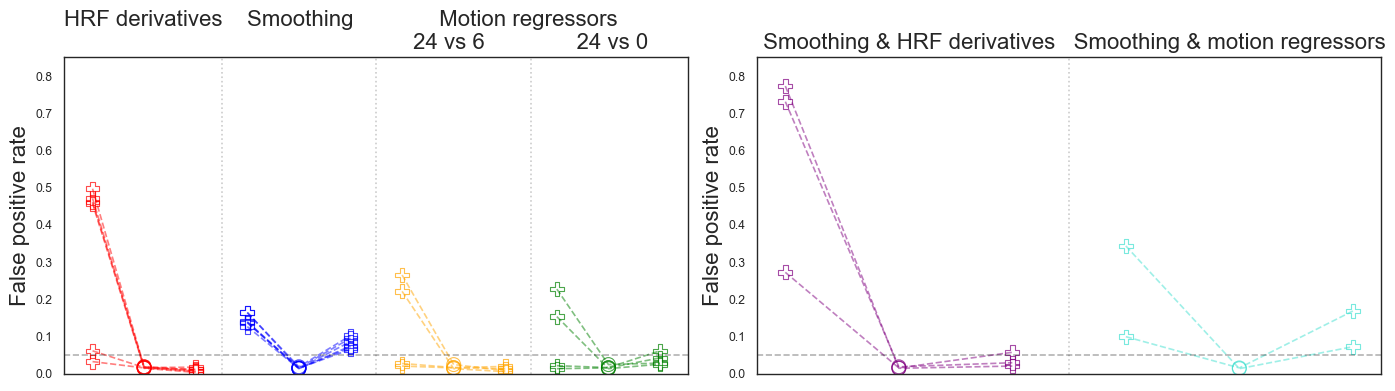

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme()
# sns.set_style("dark")
sns.set_style("white")
sns.set_context("paper")


f, ax = plt.subplots(1,2, figsize=(14,4))
ax[0].set_ylim((0,0.85))

df = df.sort_values(['Position'])
df['ER']=df['ER'].astype(float)

cols = ['red', 'blue', 'orange', 'green']
title = ['HRF derivatives', 'Smoothing', 'Motion regressors']

for i, ch in enumerate(['hrf', 'smooth','mc6', 'mc0']):

    sns.scatterplot(
        data=df.loc[df['Change']==ch],
        x="Position",
        y='ER',
        style = 'Position',
        markers = ['P', 'o', 'P'],
        figure=f,
        ax=ax[0],
        alpha=0.7,
        ec=cols[i], 
        fc="none",
        legend=False,
        s=100
    )
    
    sns.lineplot(
        data=df.loc[df['Change']==ch],
        x="Position",
        y='ER',
        hue='i',
        figure=f,
        ax=ax[0],
        palette=sns.color_palette([cols[i]], len(df.loc[df['Change']==ch])),
        linestyle='--',
        alpha=0.5,
        legend=False
    )

    if i != 3:
        ax[0].axvline(
            x=(i+1)*3-0.5, 
            color='black', 
            linestyle=':',
            alpha=0.2,
            figure=f
        )


ax[0].set_title(
    f'{title[0]}    {title[1]}              {title[2]}           \n                                              '+ 
    '           24 vs 6               24 vs 0', 
    fontsize=16,
    loc = 'left'
)

ax[0].axhline(
    y=0.05,
    color= 'black',
    linestyle='--',
    alpha=0.3,
    figure=f
)

ax[0].get_xaxis().set_visible(False)
ax[0].set_ylabel('False positive rate', fontsize=16)

ax[1].set_ylim((0,0.85))
cols = ['purple', 'turquoise']
title = ['Smoothing & HRF derivatives', 'Smoothing & motion regressors']

for i, ch in enumerate(['smooth-hrf', 'smooth-mc']):

    sns.scatterplot(
        data=df.loc[df['Change']==ch],
        x="Position",
        y='ER',
        style = 'Position',
        markers = ['P', 'o', 'P'],
        figure=f,
        ax=ax[1],
        alpha=0.7,
        ec=cols[i], 
        fc="none",
        legend=False,
        s=100
    )
    
    sns.lineplot(
        data=df.loc[df['Change']==ch],
        x="Position",
        y='ER',
        hue='i',
        figure=f,
        ax=ax[1],
        palette=sns.color_palette([cols[i]], len(df.loc[df['Change']==ch])),
        linestyle='--',
        alpha=0.5,
        legend=False
    )

    if i != 1:
        ax[1].axvline(
            x=2.5, 
            color='black', 
            linestyle=':',
            alpha=0.2,
            figure=f
        )


ax[1].set_title(f' {title[0]}   {title[1]}', fontsize=16, loc='left')

ax[1].axhline(
    y=0.05,
    color= 'black',
    linestyle='--',
    alpha=0.3,
    figure=f
)

ax[1].get_xaxis().set_visible(False)
ax[1].set_ylabel('False positive rate', fontsize=16)

f.tight_layout()
plt.savefig(f'../figures/{soft}-error_rates.png')
plt.show()

### Bland-Altman P-P plots

The following code boxes contain the code to reproduce Figure 3 of the paper with Bland Altman P-P plots. 
In the following cell, choose the software for which you want to analyze pipeline combinations and run the following cells to see the plot. 

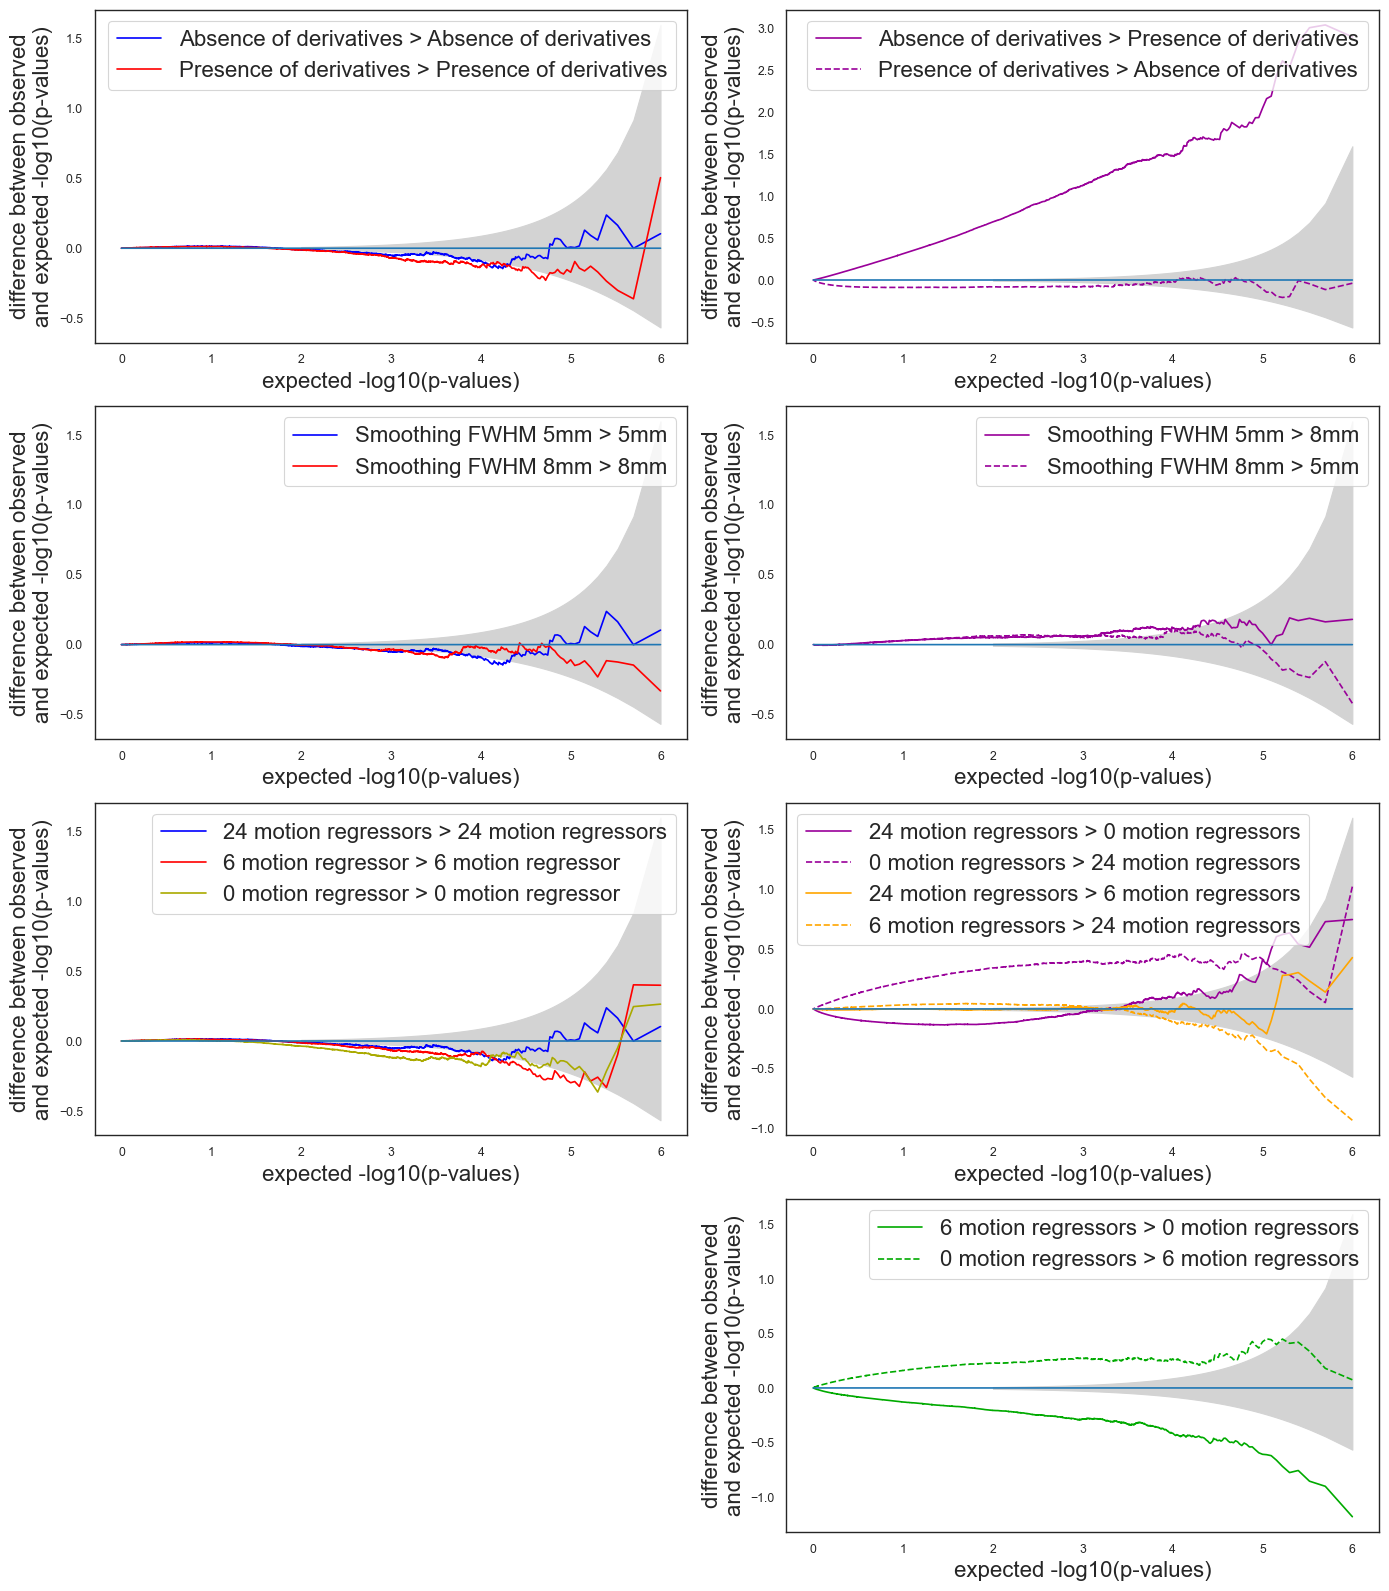

In [47]:
from lib import samples, plots
import os

# if not os.path.isdir(
#     '../figures/samples'
# ):
#     os.mkdir(
#         '../figures/samples'
#     )

soft='spm'

figs, ax = plt.subplots(
    nrows=4,
    ncols=2,
    figsize=(14, 16)
)

data1_1, data1_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-0', 
    f'{soft}-5-24-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

data2_1, data2_2 = samples.voxel_concat_sample(
    f'{soft}-8-24-0', 
    f'{soft}-8-24-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title1 = 'Smoothing FWHM 5mm > 5mm'
title2 = 'Smoothing FWHM 8mm > 8mm'

plots.pp_plot(
    [data1_1, 
    data2_1],
    [title1,
    title2],
    f=figs,
    ax1=ax[1,0]
)

data1_1, data1_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-0', 
    f'{soft}-8-24-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title1 = 'Smoothing FWHM 5mm > 8mm'
title2 = 'Smoothing FWHM 8mm > 5mm'

plots.pp_plot(
    [data1_1, 
    data1_2],
    [title1,
    title2],
    c = ['#990099', '#990099'],
    l = ['solid', 'dashed'],
    f=figs,
    ax1=ax[1,1]
)

data1_1, data1_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-0', 
    f'{soft}-5-24-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

data2_1, data2_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-1', 
    f'{soft}-5-24-1', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title1 = 'Absence of derivatives > Absence of derivatives'
title2 = 'Presence of derivatives > Presence of derivatives'

plots.pp_plot(
    [data1_1, 
    data2_1],
    [title1,
    title2],
    f=figs,
    ax1=ax[0,0]
)

data1_1, data1_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-0', 
    f'{soft}-5-24-1', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title1 = 'Absence of derivatives > Presence of derivatives'
title2 = 'Presence of derivatives > Absence of derivatives'

plots.pp_plot(
    [data1_1, 
    data1_2],
    [title1,
    title2],
    c = ['#990099', '#990099'],
    l = ['solid', 'dashed'],
    f=figs,
    ax1=ax[0,1]
)

data1_1, data1_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-0', 
    f'{soft}-5-24-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

data2_1, data2_2 = samples.voxel_concat_sample(
    f'{soft}-5-6-0', 
    f'{soft}-5-6-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

data3_1, data3_2 = samples.voxel_concat_sample(
    f'{soft}-5-0-0', 
    f'{soft}-5-0-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title1 = '24 motion regressors > 24 motion regressors'
title2 = '6 motion regressor > 6 motion regressor'
title3 = '0 motion regressor > 0 motion regressor'

plots.pp_plot(
    [data1_1, 
    data2_1,
    data3_1],
    [title1,
    title2,
    title3],
    f=figs,
    ax1=ax[2,0]
)

data1_1, data1_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-0', 
    f'{soft}-5-0-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

data2_1, data2_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-0', 
    f'{soft}-5-6-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title1 = '24 motion regressors > 0 motion regressors'
title2 = '0 motion regressors > 24 motion regressors'

title3 = '24 motion regressors > 6 motion regressors'
title4 = '6 motion regressors > 24 motion regressors'

plots.pp_plot(
    [data1_1, 
    data1_2,
    data2_1,
    data2_2],
    [title1,
    title2,
    title3,
    title4],
    c = ['#990099', '#990099','#FFA500','#FFA500'],
    l = ['solid', 'dashed','solid', 'dashed'],
    f=figs,
    ax1=ax[2,1]
)

data1_1, data1_2 = samples.voxel_concat_sample(
    f'{soft}-5-6-0', 
    f'{soft}-5-0-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title1 = '6 motion regressors > 0 motion regressors'
title2 = '0 motion regressors > 6 motion regressors'

plots.pp_plot(
    [data1_1, 
    data1_2],
    [title1,
    title2],
    c = ['#00AA00', '#00AA00'],
    l = ['solid', 'dashed'],
    f=figs,
    ax1=ax[3,1]
)

ax[3,0].axis('off')

figs.tight_layout()
plt.savefig(f'../figures/pp-plots_{soft}')
plt.show()

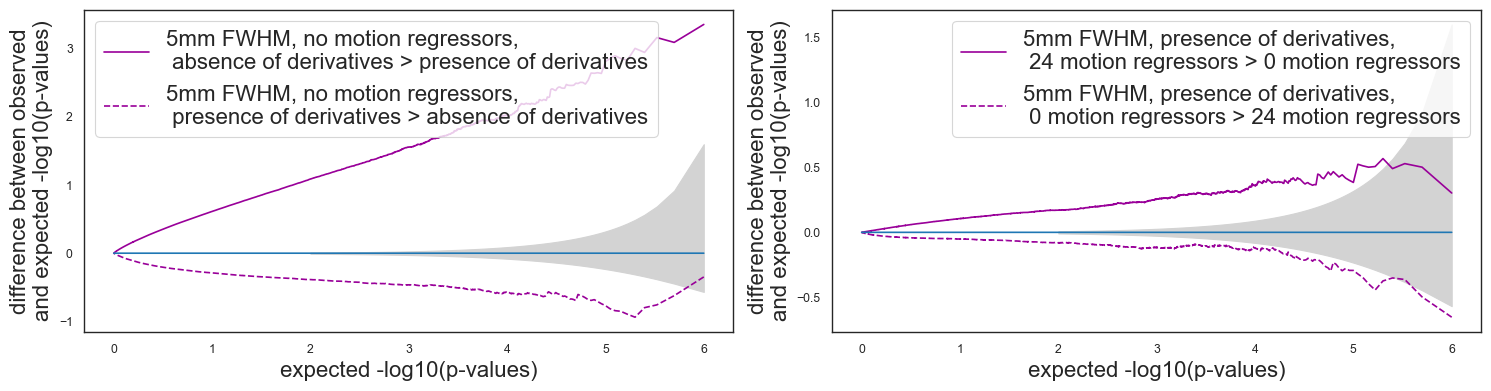

In [48]:
from lib import samples, plots
import os

soft = 'spm' 


figs, ax = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(15, 4)
)

data1_1, data1_2 = samples.voxel_concat_sample(
    f'{soft}-5-0-0', 
    f'{soft}-5-0-1', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title1 = '5mm FWHM, no motion regressors, \n absence of derivatives > presence of derivatives'
title2 = '5mm FWHM, no motion regressors, \n presence of derivatives > absence of derivatives'

plots.pp_plot(
    [data1_1, 
    data1_2],
    [title1,
    title2],
    c = ['#990099', '#990099'],
    l = ['solid', 'dashed'], 
    f=figs,
    ax1=ax[0]
)

data1_1, data1_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-1', 
    f'{soft}-5-0-1', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title1 = '5mm FWHM, presence of derivatives, \n 24 motion regressors > 0 motion regressors'
title2 = '5mm FWHM, presence of derivatives, \n 0 motion regressors > 24 motion regressors'

plots.pp_plot(
    [data1_1, 
    data1_2],
    [title1,
    title2],
    c = ['#990099', '#990099'],
    l = ['solid', 'dashed'], 
    f=figs,
    ax1=ax[1]
)

figs.tight_layout()
plt.savefig(f'../figures/pp-plots_{soft}-supplementary.png')
plt.show()

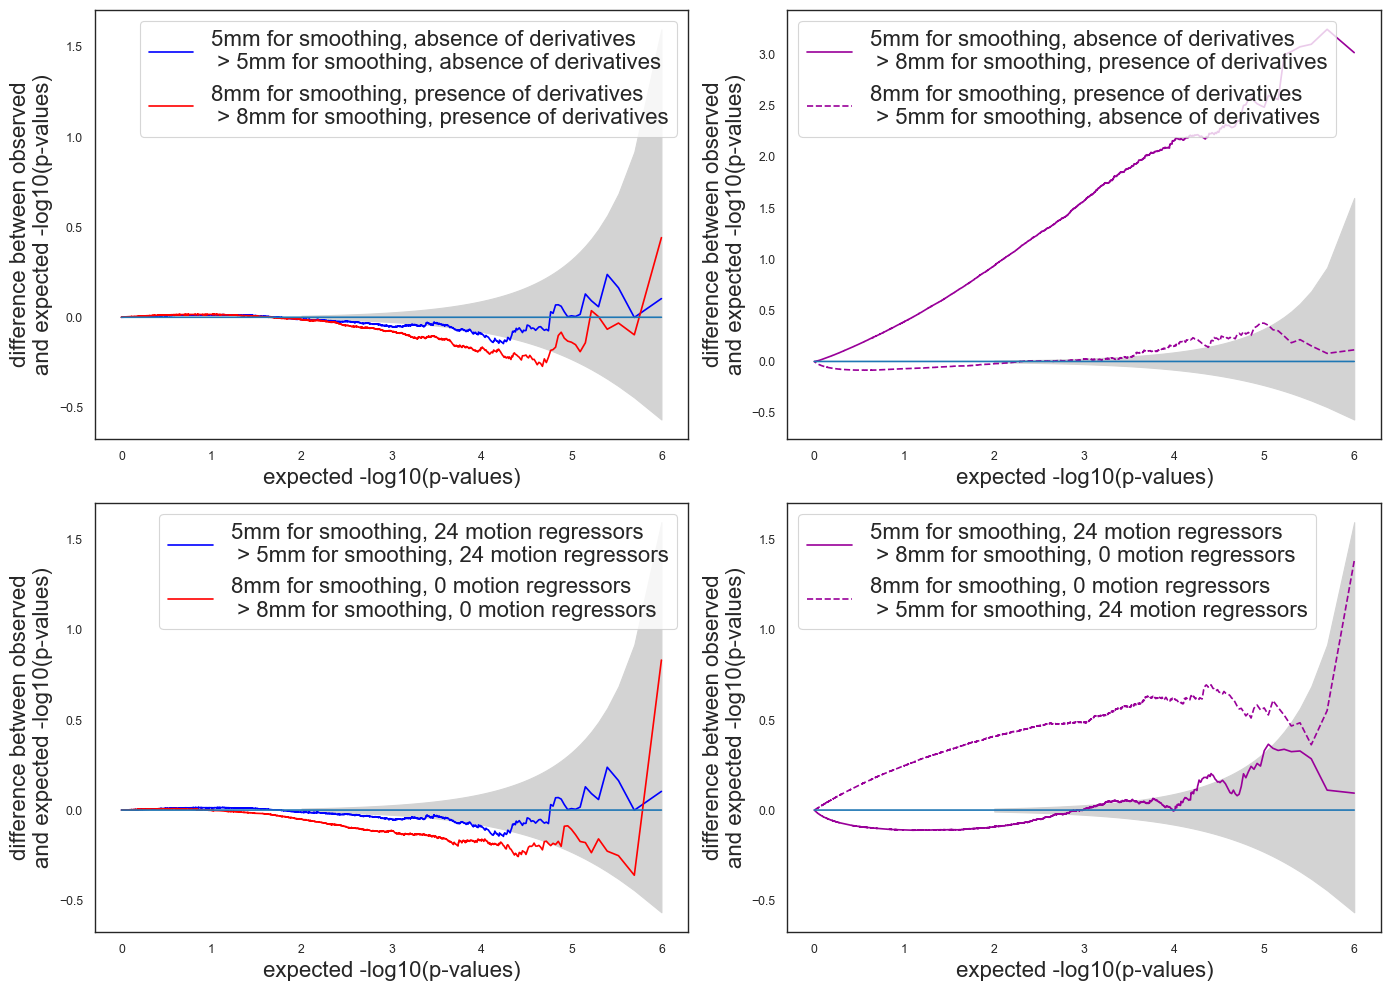

In [51]:
soft = 'spm'

figs, ax = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(14, 10)
)

##### Smoothing + HRF derivatives
data1_1, data1_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-0', 
    f'{soft}-5-24-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

data2_1, data2_2 = samples.voxel_concat_sample(
    f'{soft}-8-24-1', 
    f'{soft}-8-24-1', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title1 = '5mm for smoothing, absence of derivatives \n > 5mm for smoothing, absence of derivatives'
title2 = '8mm for smoothing, presence of derivatives \n > 8mm for smoothing, presence of derivatives'

plots.pp_plot(
    [data1_1, 
    data2_1],
    [title1,
    title2],
    f=figs,
    ax1=ax[0,0]
)

data1_1, data1_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-0', 
    f'{soft}-8-24-1', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title1 = '5mm for smoothing, absence of derivatives \n > 8mm for smoothing, presence of derivatives'
title2 = '8mm for smoothing, presence of derivatives \n > 5mm for smoothing, absence of derivatives'

plots.pp_plot(
    [data1_1, 
    data1_2],
    [title1,
    title2],
    c = ['#990099', '#990099'],
    l = ['solid', 'dashed'],
    f=figs,
    ax1=ax[0,1]
)
###### Smoothing + motion 
data1_1, data1_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-0', 
    f'{soft}-5-24-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

data2_1, data2_2 = samples.voxel_concat_sample(
    f'{soft}-8-0-0', 
    f'{soft}-8-0-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title1 = '5mm for smoothing, 24 motion regressors \n > 5mm for smoothing, 24 motion regressors'
title2 = '8mm for smoothing, 0 motion regressors \n > 8mm for smoothing, 0 motion regressors'

plots.pp_plot(
    [data1_1, 
    data2_1],
    [title1,
    title2],
    f=figs,
    ax1=ax[1,0]
)

data1_1, data1_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-0', 
    f'{soft}-8-0-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title1 = '5mm for smoothing, 24 motion regressors \n > 8mm for smoothing, 0 motion regressors'
title2 = '8mm for smoothing, 0 motion regressors \n > 5mm for smoothing, 24 motion regressors'

plots.pp_plot(
    [data1_1, 
    data1_2],
    [title1,
    title2],
    c = ['#990099', '#990099'],
    l = ['solid', 'dashed'],
    f=figs,
    ax1=ax[1,1]
)

figs.tight_layout()
plt.savefig(f'../figures/pp-plots-2param_{soft}')
plt.show()


### Distribution curves

The following code boxes contain the code to reproduce Supplementary Figures of the paper with distribution of statistical values. 
In the following cell, choose the software for which to plot the curves and run the following cells to see the plot. 

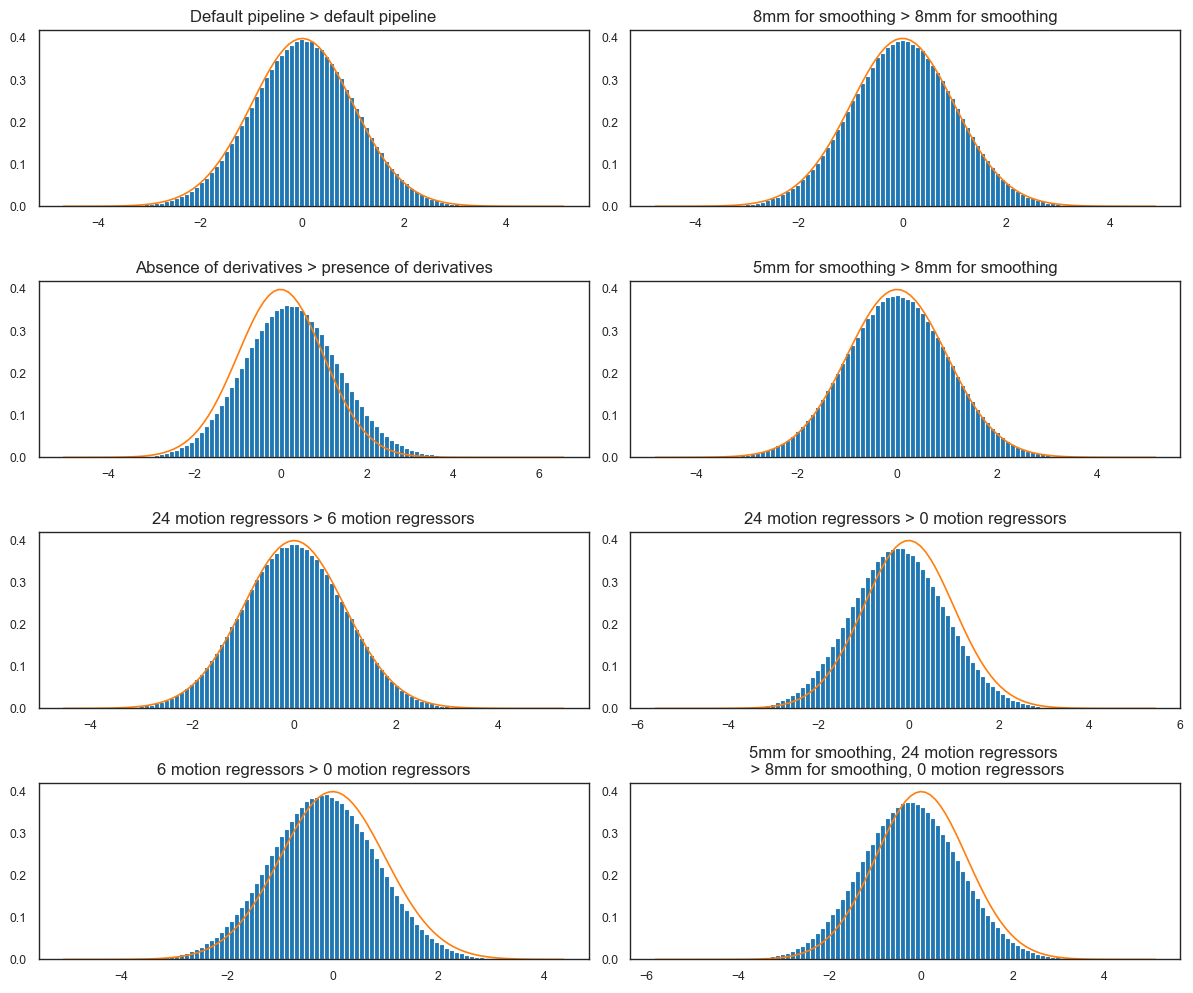

In [15]:
soft = 'spm'

figs, ax = plt.subplots(
    nrows=4,
    ncols=2,
    figsize=(12, 10)
)

data1_1, data1_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-0', 
    f'{soft}-5-24-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title1 = 'Default pipeline > default pipeline'

f = plots.distribution_plots(
    data1_1, 
    title1,
    f=figs,
    ax=ax[0,0]
)

data2_1, data2_2 = samples.voxel_concat_sample(
    f'{soft}-8-24-0', 
    f'{soft}-8-24-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title2 = '8mm for smoothing > 8mm for smoothing'


f = plots.distribution_plots(
    data2_1, 
    title2,
    f=figs,
    ax=ax[0,1]
)

data2_1, data2_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-0', 
    f'{soft}-5-24-1', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title2 = 'Absence of derivatives > presence of derivatives'


f = plots.distribution_plots(
    data2_1, 
    title2,
    f=figs,
    ax=ax[1,0]
)

data2_1, data2_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-0', 
    f'{soft}-8-24-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title2 = '5mm for smoothing > 8mm for smoothing'


f = plots.distribution_plots(
    data2_1, 
    title2,
    f=figs,
    ax=ax[1,1]
)

data2_1, data2_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-0', 
    f'{soft}-5-6-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title2 = '24 motion regressors > 6 motion regressors'


f = plots.distribution_plots(
    data2_1, 
    title2,
    f=figs,
    ax=ax[2,0]
)

data2_1, data2_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-0', 
    f'{soft}-5-0-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title2 = '24 motion regressors > 0 motion regressors'


f = plots.distribution_plots(
    data2_1, 
    title2,
    f=figs,
    ax=ax[2,1]
)

data2_1, data2_2 = samples.voxel_concat_sample(
    f'{soft}-5-6-0', 
    f'{soft}-5-0-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title2 = '6 motion regressors > 0 motion regressors'


f = plots.distribution_plots(
    data2_1, 
    title2,
    f=figs,
    ax=ax[3,0]
)

data2_1, data2_2 = samples.voxel_concat_sample(
    f'{soft}-5-24-0', 
    f'{soft}-8-0-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title2 = '5mm for smoothing, 24 motion regressors \n > 8mm for smoothing, 0 motion regressors'

f = plots.distribution_plots(
    data2_1, 
    title2,
    f=figs,
    ax=ax[3,1]
)

figs.tight_layout(pad=1.0)
plt.savefig(f'../figures/distrib-{soft}')
plt.show()

## Inter-software analyses

In the following cells, you can find the code to reproduce the Figures of the paper related to inter-software analyses.

In [18]:
df = pd.DataFrame(columns = [('Smooth 5mm', 'No derivatives'),
                            ('Smooth 5mm', 'Derivatives'),
                            ('Smooth 8mm', 'No derivatives'),
                            ('Smooth 8mm', 'Derivatives')])
for mc in ['0', '6', '24']:
    er = []
    for s in [5,8]:
        for h in [0,1]:
            with open(f'{error_rate_dir}/ER_spm-{s}-{mc}-{h}_VS_fsl-{s}-{mc}-{h}/error_rate.txt', 'r') as f:
                er_list = f.read()
            f.close()

            er.append(er_list.split(',')[0])
    df = pd.concat([df, pd.DataFrame([er], columns = df.columns)], ignore_index=True)

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index = ['0 motion regressors', '6 motion regressors', '24 motion regressors']
df

Smooth 5mm                 Smooth 8mm            
                     No derivatives Derivatives No derivatives Derivatives
0 motion regressors           0.149       0.304           0.16       0.281
6 motion regressors           0.184       0.329          0.148       0.313
24 motion regressors          0.141       0.149            0.1       0.137

In [19]:
df = pd.DataFrame(columns = [('Smooth 5mm', 'No derivatives'),
                            ('Smooth 5mm', 'Derivatives'),
                            ('Smooth 8mm', 'No derivatives'),
                            ('Smooth 8mm', 'Derivatives')])
for mc in ['0', '6', '24']:
    er = []
    for s in [5,8]:
        for h in [0,1]:
            with open(f'{error_rate_dir}/ER_spm-{s}-{mc}-{h}_VS_fsl-{s}-{mc}-{h}/error_rate.txt', 'r') as f:
                er_list = f.read()
            f.close()

            er.append(er_list.split(',')[1])
    df = pd.concat([df, pd.DataFrame([er], columns = df.columns)], ignore_index=True)

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index = ['0 motion regressors', '6 motion regressors', '24 motion regressors']
df

Smooth 5mm                 Smooth 8mm            
                     No derivatives Derivatives No derivatives Derivatives
0 motion regressors           0.954       0.903           0.72       0.606
6 motion regressors           0.962       0.885          0.818       0.568
24 motion regressors          0.934       0.922          0.785       0.828

In [20]:
soft='spm'
soft_b = 'fsl'

er_same_soft_list = [
    f'ER_{soft}-5-0-0_VS_{soft}-5-0-0',
    f'ER_{soft}-5-0-1_VS_{soft}-5-0-1',
    f'ER_{soft}-5-6-0_VS_{soft}-5-6-0',
    f'ER_{soft}-5-6-1_VS_{soft}-5-6-1',
    f'ER_{soft}-5-24-0_VS_{soft}-5-24-0',
    f'ER_{soft}-5-24-1_VS_{soft}-5-24-1',
    f'ER_{soft}-8-0-0_VS_{soft}-8-0-0',
    f'ER_{soft}-8-0-1_VS_{soft}-8-0-1',
    f'ER_{soft}-8-6-0_VS_{soft}-8-6-0',
    f'ER_{soft}-8-6-1_VS_{soft}-8-6-1',
    f'ER_{soft}-8-24-0_VS_{soft}-8-24-0',
    f'ER_{soft}-8-24-1_VS_{soft}-8-24-1',
]

er_soft_list = [
    f'ER_{soft}-5-0-0_VS_{soft_b}-5-0-0',
    f'ER_{soft}-5-0-1_VS_{soft_b}-5-0-1',
    f'ER_{soft}-5-6-0_VS_{soft_b}-5-6-0',
    f'ER_{soft}-5-6-1_VS_{soft_b}-5-6-1',
    f'ER_{soft}-5-24-0_VS_{soft_b}-5-24-0',
    f'ER_{soft}-5-24-1_VS_{soft_b}-5-24-1',
    f'ER_{soft}-8-0-0_VS_{soft_b}-8-0-0',
    f'ER_{soft}-8-0-1_VS_{soft_b}-8-0-1',
    f'ER_{soft}-8-6-0_VS_{soft_b}-8-6-0',
    f'ER_{soft}-8-6-1_VS_{soft_b}-8-6-1',
    f'ER_{soft}-8-24-0_VS_{soft_b}-8-24-0',
    f'ER_{soft}-8-24-1_VS_{soft_b}-8-24-1',
]

# er_same_soft_hrf_list = [
#     #f'ER_{soft}-5-0-0_VS_{soft}-5-0-0',
#     f'ER_{soft}-5-0-1_VS_{soft}-5-0-1',
#     #f'ER_{soft}-5-6-0_VS_{soft}-5-6-0',
#     f'ER_{soft}-5-6-1_VS_{soft}-5-6-1',
#     #f'ER_{soft}-5-24-0_VS_{soft}-5-24-0',
#     f'ER_{soft}-5-24-1_VS_{soft}-5-24-1',
#     #f'ER_{soft}-8-0-0_VS_{soft}-8-0-0',
#     f'ER_{soft}-8-0-1_VS_{soft}-8-0-1',
#     #f'ER_{soft}-8-6-0_VS_{soft}-8-6-0',
#     f'ER_{soft}-8-6-1_VS_{soft}-8-6-1',
#     #f'ER_{soft}-8-24-0_VS_{soft}-8-24-0',
#     f'ER_{soft}-8-24-1_VS_{soft}-8-24-1',
# ]

# er_soft_hrf_list = [
#     #f'ER_{soft}-5-0-0_VS_{soft_b}-5-0-0',
#     f'ER_{soft}-5-0-1_VS_{soft_b}-5-0-1',
#     #f'ER_{soft}-5-6-0_VS_{soft_b}-5-6-0',
#     f'ER_{soft}-5-6-1_VS_{soft_b}-5-6-1',
#     #f'ER_{soft}-5-24-0_VS_{soft_b}-5-24-0',
#     f'ER_{soft}-5-24-1_VS_{soft_b}-5-24-1',
#     #f'ER_{soft}-8-0-0_VS_{soft_b}-8-0-0',
#     f'ER_{soft}-8-0-1_VS_{soft_b}-8-0-1',
#     #f'ER_{soft}-8-6-0_VS_{soft_b}-8-6-0',
#     f'ER_{soft}-8-6-1_VS_{soft_b}-8-6-1',
#     #f'ER_{soft}-8-24-0_VS_{soft_b}-8-24-0',
#     f'ER_{soft}-8-24-1_VS_{soft_b}-8-24-1',
# ]

In [21]:
import pandas as pd
error_rate_dir = '../figures/error_rates'
df = pd.DataFrame(columns = ['ER', 'Position', 'Change', 'i'])

for i, er in enumerate(er_same_soft_list):
    with open(f'{error_rate_dir}/{er}/error_rate.txt', 'r') as f:
        er_list = f.read()
    f.close()
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[0]], "Position":['b'], 'Change':['soft'], 'i':[i]})], ignore_index=True)

for i, er in enumerate(er_soft_list):
    with open(f'{error_rate_dir}/{er}/error_rate.txt', 'r') as f:
        er_list = f.read()
    f.close()
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[0]], "Position":['a'], 'Change':['soft'], 'i':[i]})], ignore_index=True)
    df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[1]], "Position":['c'], 'Change':['soft'], 'i':[i]})], ignore_index=True)

# for i, er in enumerate(er_same_soft_hrf_list):
#     with open(f'{error_rate_dir}/{er}/error_rate.txt', 'r') as f:
#         er_list = f.read()
#     f.close()
#     df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[0]], "Position":['e'], 'Change':['soft-hrf'], 'i':[i]})], ignore_index=True)

# for i, er in enumerate(er_soft_hrf_list):
#     with open(f'{error_rate_dir}/{er}/error_rate.txt', 'r') as f:
#         er_list = f.read()
#     f.close()
#     df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[0]], "Position":['d'], 'Change':['soft-hrf'], 'i':[i]})], ignore_index=True)
#     df = pd.concat([df, pd.DataFrame({"ER":[er_list.split(',')[1]], "Position":['f'], 'Change':['soft-hrf'], 'i':[i]})], ignore_index=True)


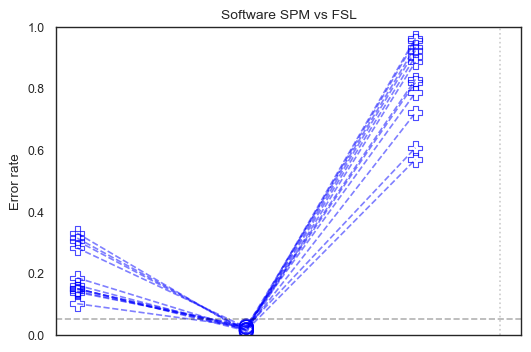

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme()
# sns.set_style("dark")
sns.set_style("white")
sns.set_context("paper")


f, ax = plt.subplots(figsize=(6,4))
ax.set_ylim((0,1))

df = df.sort_values(['Position'])
df['ER']=df['ER'].astype(float)

cols = ['blue', 'red']
title = 'Software SPM vs FSL'

for i, ch in enumerate(['soft']):

    sns.scatterplot(
        data=df.loc[df['Change']==ch],
        x="Position",
        y='ER',
        style = 'Position',
        markers = ['P', 'o', 'P'],
        figure=f,
        ax=ax,
        alpha=0.7,
        ec=cols[i], 
        fc="none",
        legend=False,
        s=100
    )
    
    sns.lineplot(
        data=df.loc[df['Change']==ch],
        x="Position",
        y='ER',
        hue='i',
        figure=f,
        ax=ax,
        palette=sns.color_palette([cols[i]], len(df.loc[df['Change']==ch])),
        linestyle='--',
        alpha=0.5,
        legend=False
    )



ax.set_title(
    title, 
    fontsize=10,
)

ax.axhline(
    y=0.05,
    color= 'black',
    linestyle='--',
    alpha=0.3,
    figure=f
)

ax.axvline(
    x=2.5, 
    color='black', 
    linestyle=':',
    alpha=0.2,
    figure=f
)

ax.get_xaxis().set_visible(False)
ax.set_ylabel('Error rate')
plt.savefig('../figures/between-soft_error-rates.png')

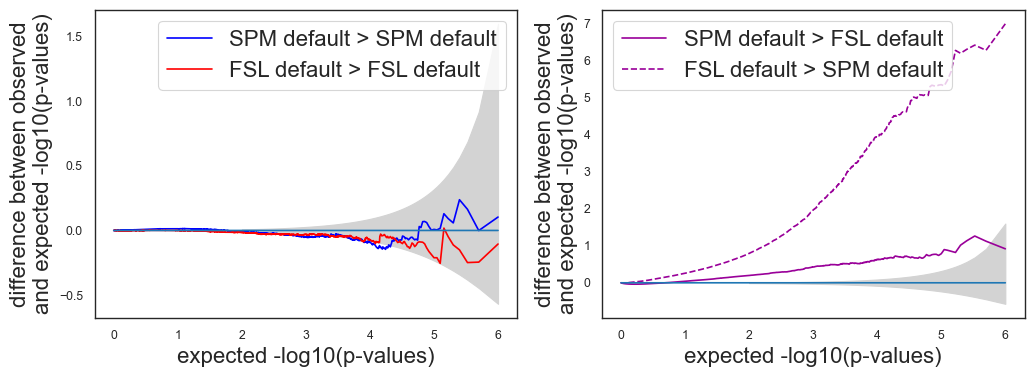

In [52]:
##### Software
figs, ax = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(12, 4)
)

data1_1, data1_2 = samples.voxel_concat_sample(
    f'spm-5-24-0', 
    f'spm-5-24-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

data2_1, data2_2 = samples.voxel_concat_sample(
    f'fsl-5-24-0', 
    f'fsl-5-24-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

data3_1, data3_2 = samples.voxel_concat_sample(
    f'spm-5-24-0', 
    f'fsl-5-24-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title1 = 'SPM default > SPM default'
title2 = 'FSL default > FSL default'
title3 = 'SPM default > FSL default'
title4 = 'FSL default > SPM default'

plots.pp_plot(
    [data1_1, 
    data2_1],
    [title1,
    title2],
    f=figs,
    ax1=ax[0]
)

plots.pp_plot(
    [data3_1, 
    data3_2],
    [title3,
    title4],
    c = ['#990099', '#990099'],
    l = ['solid', 'dashed'],
    f=figs,
    ax1=ax[1]
)

plt.savefig('../figures/between-soft_pp-plots.png')

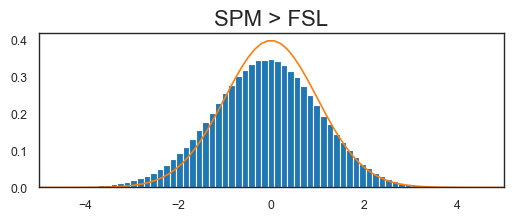

In [54]:
import importlib
importlib.reload(plots)
figs, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(6,2)
)

data1_1, data1_2 = samples.voxel_concat_sample(
    f'spm-5-24-0', 
    f'fsl-5-24-0', 
    '../figures/samples/',
    '/Volumes/hcp_pipelines_compatibility/figures'
)

title1 = 'SPM > FSL'

f = plots.distribution_plots(
    data1_1, 
    title1,
    f=figs,
    ax=ax
)

plt.savefig('../figures/between-soft_distrib.png')